# Pymaceuticals Inc.
---

### Analysis
- These tests were administered to about the same number of male and female mice. 
- The drug regimens administered to the greatest numbers of mice were Capomulin and Ramicane. Hence, results yielded by these treatments were perhaps the more reliable than others. Although, we did find outliers among the tumor volumes for both the Capomulin and Ramicane treatments. 
- Mouse b128, a subject of the Capomulin regimen, showed a drastic decrease in tumor volume over the course of her treatment. 
- The median tumor volume for Capomulin and Ramicane (41.56mm3 and 40.67mm3, respectively) were lower than the median tumor volumes of all other treatments. 
- For the Capomulin regimen, heavier mice were linearly correlated with tumors of greater volume, with a fairly high r-value of about 0.84. This begs the question of whether or not male or female mice tend to be heavier and therefore more prone to larger tumors; although, in these experiments the average weight of male mice, 25.42g, happened to be slightly less than the average weight of female mice in these experiments, which was 25.92g. Also, for the Capomulin regimen, we found that the correlation between weight and Average Tumor Volume was stronger for female mice, with an r-value of 0.91, than the same correlation for male mice, which had an r-value of 0.77. 
 

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(study_results, mouse_metadata, on="Mouse ID")
# Display the data table for preview
data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [79]:
# Checking the number of mice.
len(data_complete["Mouse ID"].unique())

249

In [80]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
smaller_data = data_complete[["Mouse ID", "Timepoint"]]
duplicate = smaller_data.loc[smaller_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [81]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df = data_complete[data_complete["Mouse ID"] == "g989"]
duplicated_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_cleaned = data_complete[data_complete["Mouse ID"] != "g989"]
df_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [83]:
# Checking the number of mice in the clean DataFrame.
len(df_cleaned["Mouse ID"].value_counts())

248

## Summary Statistics

In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
means = df_cleaned.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
medians = df_cleaned.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variances = df_cleaned.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stds = df_cleaned.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sems = df_cleaned.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_statistics = pd.DataFrame({
    "Mean Tumor Volume":means,
    "Median Tumor Volume":medians,
    "Tumor Volume Variance":variances,
    "Tumor Volume Std. Dev.":stds,
    "Tumor Volume Std. Err.":sems
})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html
df_cleaned.groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]

C:\Users\aloun\AppData\Local\Temp\ipykernel_2468\3939097590.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_cleaned.groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

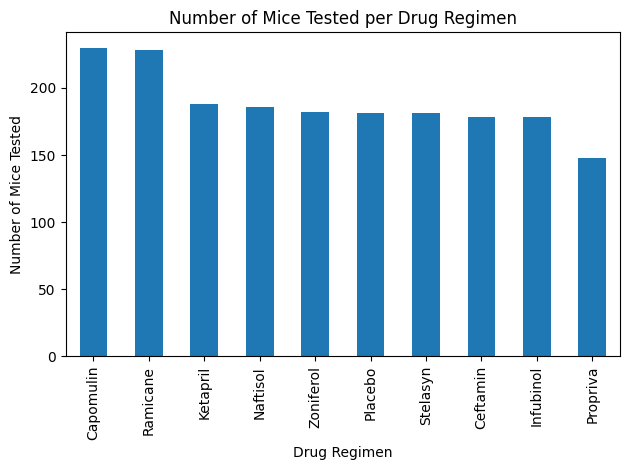

In [86]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
# grouping by drug regimen, and sorting from greatest to least
counts_per_drug = df_cleaned.groupby(["Drug Regimen"]).count()['Mouse ID'].sort_values(ascending=False)

fig = counts_per_drug.plot(kind="bar")
fig.set_xlabel("Drug Regimen")
fig.set_ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested per Drug Regimen")
plt.tight_layout()

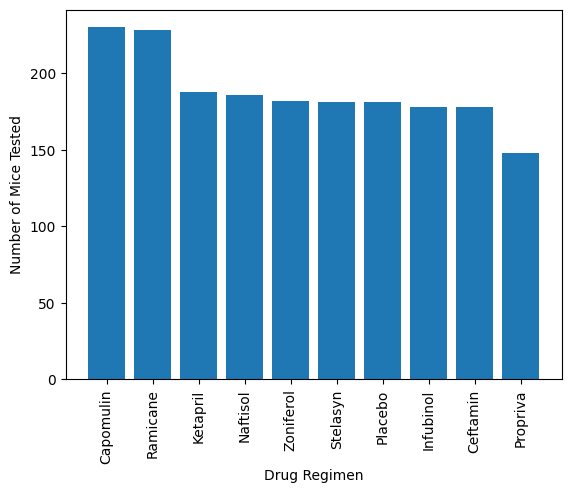

In [87]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# setting the x ticks
x_axis = [i for i in range(len(df_cleaned["Drug Regimen"].value_counts()))]
tick_locations = [value for value in x_axis]
drugs = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]
plt.xticks(tick_locations, drugs, rotation="vertical")

# setting labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

# creating the graph
plt.bar(x_axis, counts_per_drug)

# printing the graph
plt.show()

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# we can't group by just Mouse ID because then there would be no Sex column to group by afterwards, so we group by both columns here
gb_sex = df_cleaned.groupby(["Mouse ID", "Sex"])
sex_df = pd.DataFrame(gb_sex.size())

# grouping by Sex again
gb_sex_twice = sex_df.groupby(["Sex"])

# creating a dataframe with no column name(s)
sex_df = pd.DataFrame(gb_sex_twice.size())
sex_df


,0
Sex,
Female,123
Male,125


In [89]:
# naming the column
sex_df.columns = ['Count']
display(sex_df)

# computing the percentages
sex_df["Percentage"] = (sex_df['Count'] / sex_df["Count"].sum()) * 100
display(sex_df)

,Count
Sex,
Female,123
Male,125


,Count,Percentage
Sex,,
Female,123,49.596774
Male,125,50.403226


Text(0.5, 1.0, 'Gender Distribution')

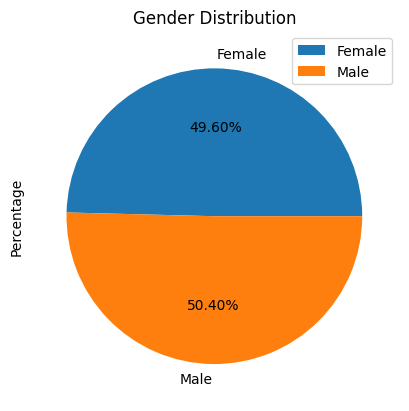

In [90]:
# "pie requires either y column or 'subplots=True'"
sex_df.plot.pie(y="Percentage", autopct="%.2f%%")
plt.title("Gender Distribution")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


([<matplotlib.patches.Wedge at 0x275bf4be9a0>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.60%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.40%')])

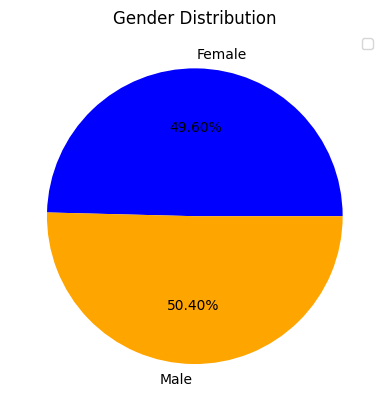

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female", "Male"]
colors = ["blue", "orange"]
# getting the values
values = sex_df["Count"]
# making the plot
plt.legend(loc="best")
plt.title("Gender Distribution")
plt.pie(values, labels=labels, colors=colors, autopct="%.2f%%")

## Quartiles, Outliers and Boxplots

In [92]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
gb_mouse_id = df_cleaned.groupby(["Mouse ID"])
max_timepoints_df = gb_mouse_id.max()["Timepoint"]
# Resetting the index, which was "Mouse ID"
max_timepoints_df = max_timepoints_df.reset_index()

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Merging on "Mouse ID" alone gives us Timepoint_x and Timepoint_y columns
max_time_df = max_timepoints_df.merge(df_cleaned, on=("Mouse ID", "Timepoint"), how="left")
max_time_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [93]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorVolumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Taking the subset with each drug
    subset_df = df_cleaned[df_cleaned['Drug Regimen'] == t]
    gb_treatment = subset_df.groupby("Mouse ID")
    max_timepoints = gb_treatment.max()['Timepoint']
    # isinstance(max_timepoints, pd.DataFrame) returns False, so we convert it to a dataframe
    max_timepoints_df = pd.DataFrame(max_timepoints)
    max_time_df = max_timepoints_df.merge(df_cleaned, on="Mouse ID", how="left")
    
    # add subset 
    tumorVolumes.append(max_time_df.loc[:,'Tumor Volume (mm3)'])
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorVolumes[len(tumorVolumes) - 1].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f"The lower quartile for {t} is {lowerq}.")
    print(f"The upper quartile for {t} is {upperq}.")
    print(f"The interquartile range for {t} is {iqr}.")
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"The lower bound for {t} is {lower_bound}.")
    print(f"The upper bound for {t} is {upper_bound}.")
    
    outliers_df = max_time_df[(max_time_df['Tumor Volume (mm3)'] < lower_bound) | (max_time_df['Tumor Volume (mm3)'] > upper_bound)]['Tumor Volume (mm3)']
    print(t + "'s potential outliers: ", end="")
    print(outliers_df)
    print()

The lower quartile for Capomulin is 37.685932865.
The upper quartile for Capomulin is 45.0.
The interquartile range for Capomulin is 7.314067135000002.
The lower bound for Capomulin is 26.714832162499995.
The upper bound for Capomulin is 55.9711007025.
Capomulin's potential outliers: 155    25.472143
156    23.343598
Name: Tumor Volume (mm3), dtype: float64

The lower quartile for Ramicane is 36.674634585.
The upper quartile for Ramicane is 45.0.
The interquartile range for Ramicane is 8.325365415.
The lower bound for Ramicane is 24.1865864625.
The upper bound for Ramicane is 57.488048122500004.
Ramicane's potential outliers: 136    22.050126
Name: Tumor Volume (mm3), dtype: float64

The lower quartile for Infubinol is 47.3123533.
The upper quartile for Infubinol is 57.314443967500004.
The interquartile range for Infubinol is 10.002090667500006.
The lower bound for Infubinol is 32.309217298749985.
The upper bound for Infubinol is 72.31757996875001.
Infubinol's potential outliers: Serie

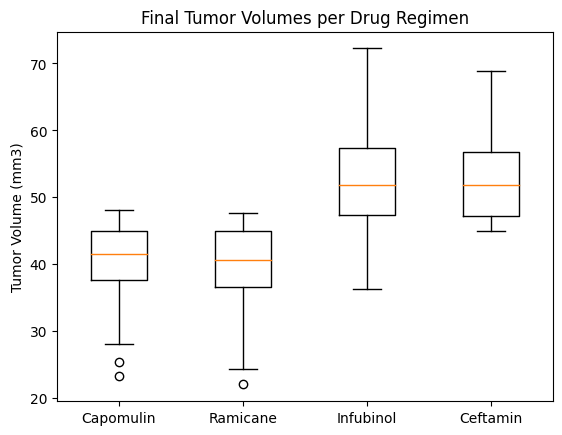

In [94]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volumes per Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumorVolumes)
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

In [95]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# select only Capomulin data
df_capomulin = df_cleaned[df_cleaned["Drug Regimen"] == "Capomulin"]
df_capomulin.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


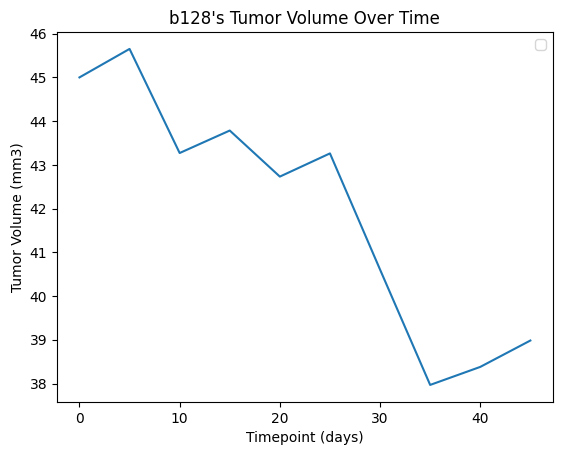

In [96]:
# select only data for mouse b128
df_b128 = df_capomulin.loc[df_capomulin["Mouse ID"] == "b128"]

# create Series of tumor volume for each mouse
tumor_volumes = df_b128["Tumor Volume (mm3)"]

# create Series of Timepoints for each mouse
times = df_b128["Timepoint"]

# making the plot
plt.plot(times, tumor_volumes)
plt.title("b128's Tumor Volume Over Time")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.show()

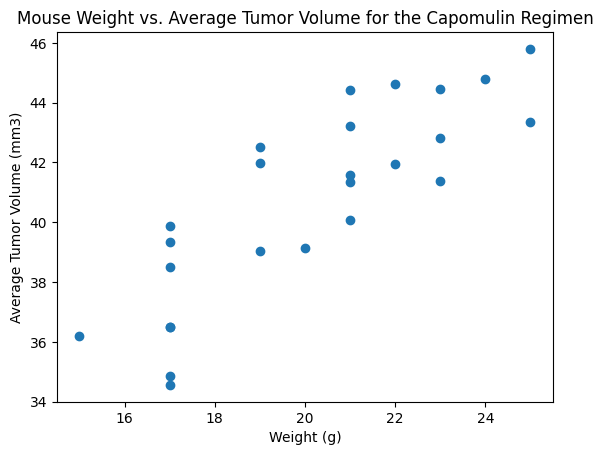

In [107]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
gb_mouse_id = df_capomulin.groupby("Mouse ID")

# x axis
weight = gb_mouse_id.max()["Weight (g)"]

# y axis
avg_tumor_volume = gb_mouse_id.mean()["Tumor Volume (mm3)"]

# making the plot
plt.scatter(weight, avg_tumor_volume)
plt.title("Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The r-value is 0.8419363424694721.


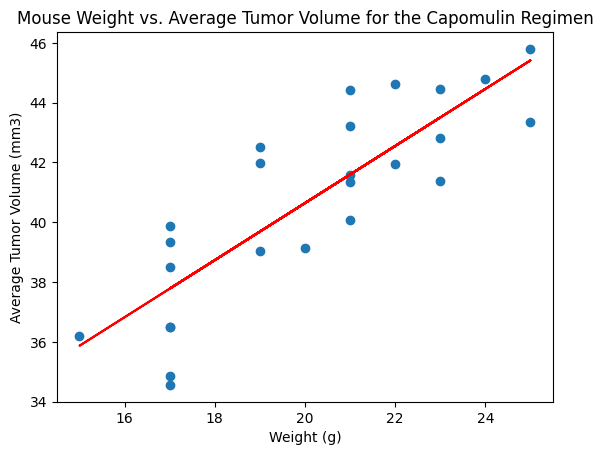

In [108]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_volume)
regress_values = slope * weight + intercept
print(f"The r-value is {rvalue}.")
plt.scatter(weight, avg_tumor_volume)
plt.plot(weight, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen")
plt.show()

In [99]:
df_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [104]:
# getting male and female subsets
df_male = df_capomulin.loc[df_capomulin['Sex'] == 'Male']
df_female = df_capomulin.loc[df_capomulin['Sex'] == 'Female']

# grouping by mouse ID
gb_mouse_id_male = df_male.groupby("Mouse ID")
gb_mouse_id_female = df_female.groupby("Mouse ID")

# getting the weights and average tumor volumes
male_weight = gb_mouse_id_male.max()['Weight (g)']
female_weight = gb_mouse_id_female.max()['Weight (g)']
male_atv = gb_mouse_id_male.mean()['Tumor Volume (mm3)']
female_atv = gb_mouse_id_female.mean()['Tumor Volume (mm3)']

The male r-value is 0.7667543556614429.
The female r-value is 0.9133036196425933.


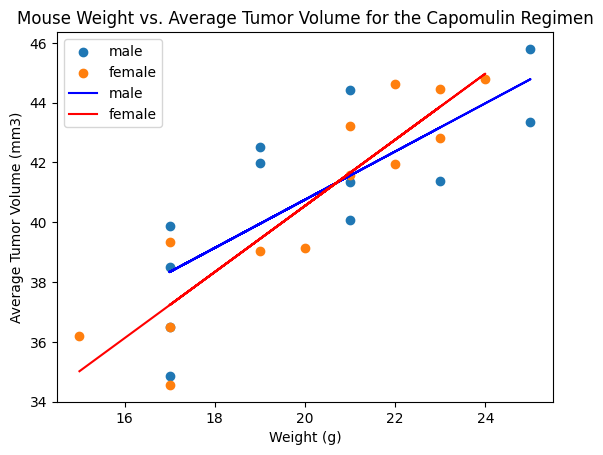

In [106]:
fig = plt.figure()
ax2 = fig.add_subplot()

(male_slope, male_intercept, male_rvalue, male_pvalue, male_stderr) = st.linregress(male_weight, male_atv)
(female_slope, female_intercept, female_rvalue, female_pvalue, female_stderr) = st.linregress(female_weight, female_atv)
male_regress_values = male_slope * male_weight + male_intercept
female_regress_values = female_slope * female_weight + female_intercept
print(f"The male r-value is {male_rvalue}.")
print(f"The female r-value is {female_rvalue}.")
ax2.scatter(male_weight, male_atv, label='male')
ax2.scatter(female_weight, female_atv, label="female")
ax2.plot(male_weight, male_regress_values, "b-", label="male")
ax2.plot(female_weight, female_regress_values, "r-", label="female")
plt.legend(loc="best")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen")
plt.show()

In [102]:
# FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
average_male_weight = df_male.mean(numeric_only=True)['Weight (g)']
average_male_weight

25.419624217118997

In [103]:
average_female_weight = df_female.mean(numeric_only=True)['Weight (g)'].astype(float)
average_female_weight

25.90997830802603